<a id='top'></a>
## Exercise 6 Classification Tree

- <a href='#problems'>Problems 1 and 2</a>
:  Predicting `CentralAir` using `SalePrice`, `GrLivArea`, `LotArea`, `TotalBsmtSF`

- <a href='#problemsSummary'>Summary for Problems 1 and 2

- <a href='#problemsTrees'>Decision Trees for Problems 1 and 2</a>

- <a href='#conclusion'>Conclusion</a>

- <a href='#bonus1'>Bonus1</a>

- <a href='#bonus2'>Bonus2</a>

- <a href='#bonus1Tree'>Decision Tree for Bonus 1</a>

- <a href='#bonus2Tree'>Decision Tree for Bonus 2</a>

- <a href='#bonus1Summary'>Bonus1 Summary</a>

- <a href='#bonus2Summary'>Bonus2 Summary</a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

sb.set()

### Helper Functions

In [2]:
def analyze(y_true, y_pred, results, xticklabels = ['N', 'Y'], yticklabels = ['N', 'Y'], 
            title='None', current_feature='None', plot=True):
    
    if plot:
        sb.catplot(x = current_feature, y = 'CentralAir', 
                   data = houseData, kind = 'box')
        plt.title(title)
        plt.show()
        sb.catplot(x = current_feature, y = 'CentralAir', 
                   data = houseData, kind = 'swarm')
        plt.title(title)
        plt.show()
    
    cm = confusion_matrix(y_true, y_pred)
    sb.heatmap(cm, 
               annot = True, fmt=".0f", annot_kws={"size": 18}, 
               xticklabels = xticklabels, yticklabels = yticklabels)

    bottom, top = plt.ylim()
    bottom += 0.5 
    top -= 0.5
    plt.ylim(bottom, top)
    plt.title(f'Confusion Matrix for {title}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    total_Y, total_N = y_true['CentralAir'].value_counts()
    ratio = cm.ravel() / [total_N, total_Y, total_N, total_Y] # (tn, fp, fn, tp) / 
                                                              # [total_N, total_Y, total_N, total_Y]
    
    results['score'].append(np.round(accuracy_score(y_true, y_pred), 2))
    results['ravel'].append(cm.ravel())
    results['ravel_ratio'].append(np.round(ratio, 2))
    
    return results

In [3]:
def split_analyze(feature, response, results, override_title = False, max_depth = None):
    X_train, X_test, y_train, y_test = train_test_split(feature, response, test_size = 0.25,
                                                              random_state = 1)

    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)
    X_test = pd.DataFrame(X_test)
    y_test = pd.DataFrame(y_test)

    dectree = DecisionTreeClassifier(max_depth = max_depth)
    dectree.fit(X_train, y_train)
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    treedot = export_graphviz(dectree,
                              feature_names = X_train.columns,
                              out_file = None,
                              filled = True,
                              rounded = True,
                              special_characters = True)
    graph = graphviz.Source(treedot)
    
    current_feature = X_train.columns[0] if not override_title else override_title
    print(f'Analyzing {current_feature}')
    results['graph'].append([current_feature, graph])
    results['names'].append(f'Train_{current_feature}')
    results['names'].append(f'Test_{current_feature}')
    
    plot = False if override_title else True
    results = analyze(y_train, y_train_pred, results, title=f'Train_{current_feature}', 
                      current_feature = current_feature, plot = plot)
    results = analyze(y_test, y_test_pred, results, title=f'Test_{current_feature}', 
                      current_feature = current_feature, plot=False)
    
    return results

In [4]:
def display(results):
    return pd.DataFrame(list(zip(results['names'], results['score'], results['ravel'],
                        results['ravel_ratio'])),
                        columns = ['Names', 'Classif Acc', 'TN, FP, FN, TP', 'Ratio to total N or Y'])

<a id='problems'></a>

### Problems 1 and 2
Predicting `CentralAir` using `SalePrice`, `GrLivArea`, `LotArea`, `TotalBsmtSF`

<a href='#top'>Back to Top</a>

In [5]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


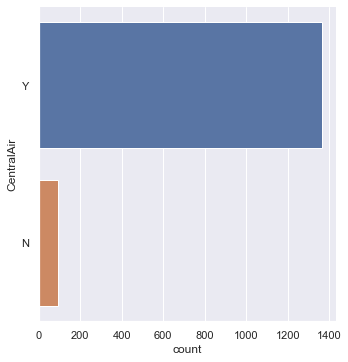

In [6]:
sb.catplot(y = "CentralAir", data = houseData, kind = "count")

In trying to minimize loss and increase accuracy, model may predict `Y` for all values of input.

In [7]:
results = {'ravel': [], 
           'ravel_ratio': [],
           'score': [],
           'graph': [],
           'names': []
          }

response = houseData['CentralAir']

Analyzing SalePrice


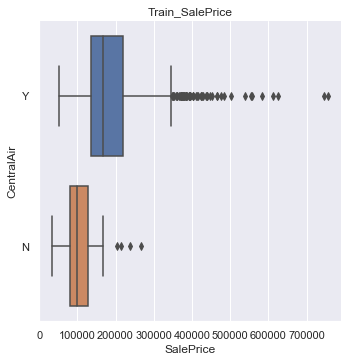

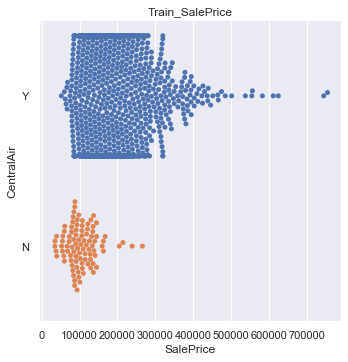

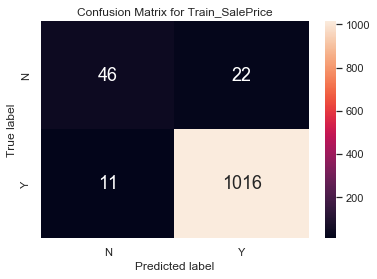

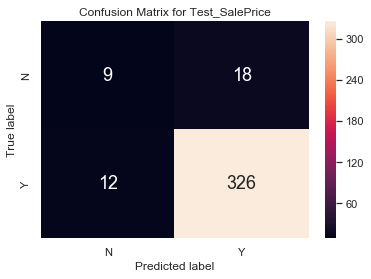

Analyzing GrLivArea


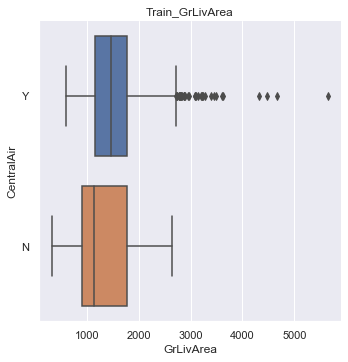

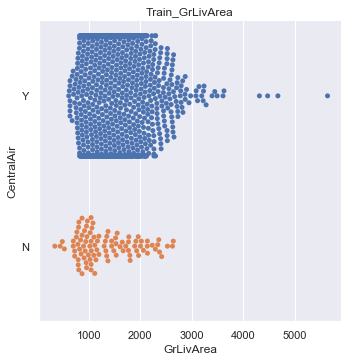

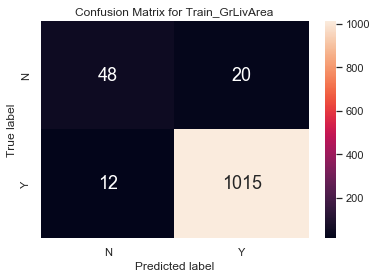

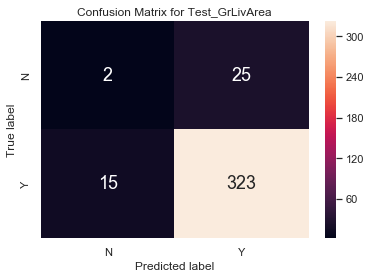

Analyzing LotArea


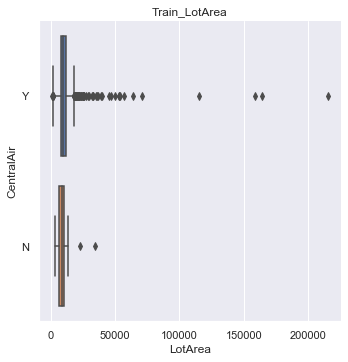

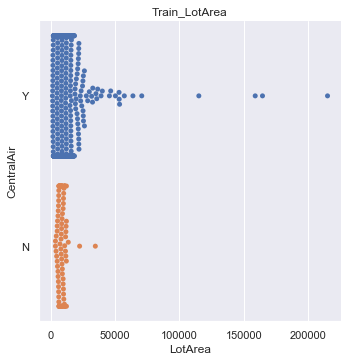

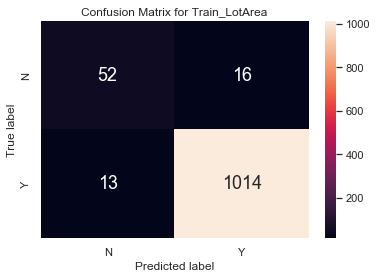

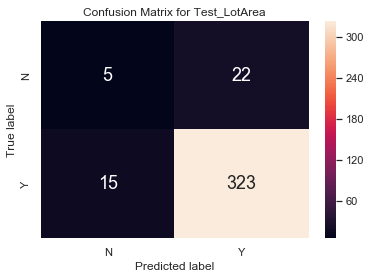

Analyzing TotalBsmtSF


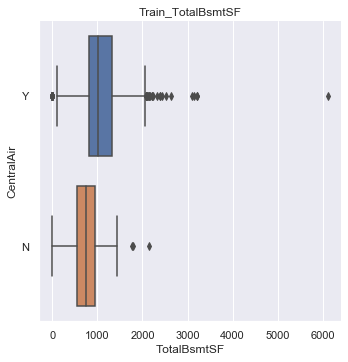

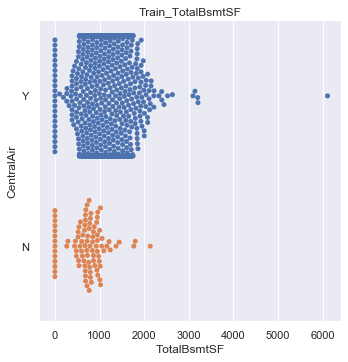

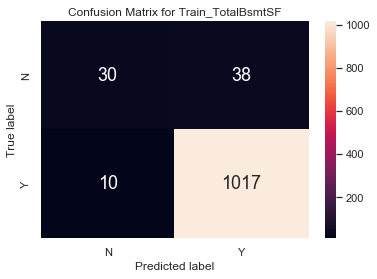

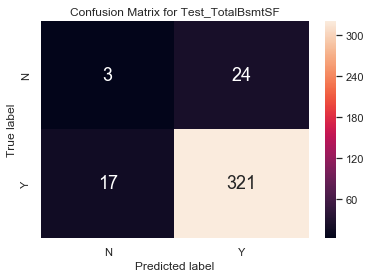

In [8]:
for uni_feature in ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']:
    feature = houseData[uni_feature]
    results = split_analyze(feature, response, results)

<a id='insights'></a>

**Insights:**

- IQR of `SalePrice` for `Y` and `N` are distinct
- IQR of `GrLivArea` for `Y` and `N` are similar
- IQR of `LotArea` for `Y` and `N` are similar
- IQR of `TotalBsmtSF` for `Y` and `N` are semi-distinct

This suggests `SalePrice` is the best feature individually to predict `CentralAir`. 

In addition:

- Points with `SalePrice > 150 000` are highly likely to be `Y`
- Points with `GrLivArea > 1200` are highly likely to be `Y`
- Points with `LotArea > 10 000` are highly likely to be `Y`
- Points with `TotalBsmtSF > 1000` are highly likely to be `Y`

This suggests that `GrLivArea`, `LotArea`, `TotalBsmtSF` used concurrently a features may further improve univariate `SalePrice` model as opposed to using any combination of these 3 features.

<a id='problemsTrees'></a>

### Visualization of Decision Trees

<a href='#top'>Back to Top</a>

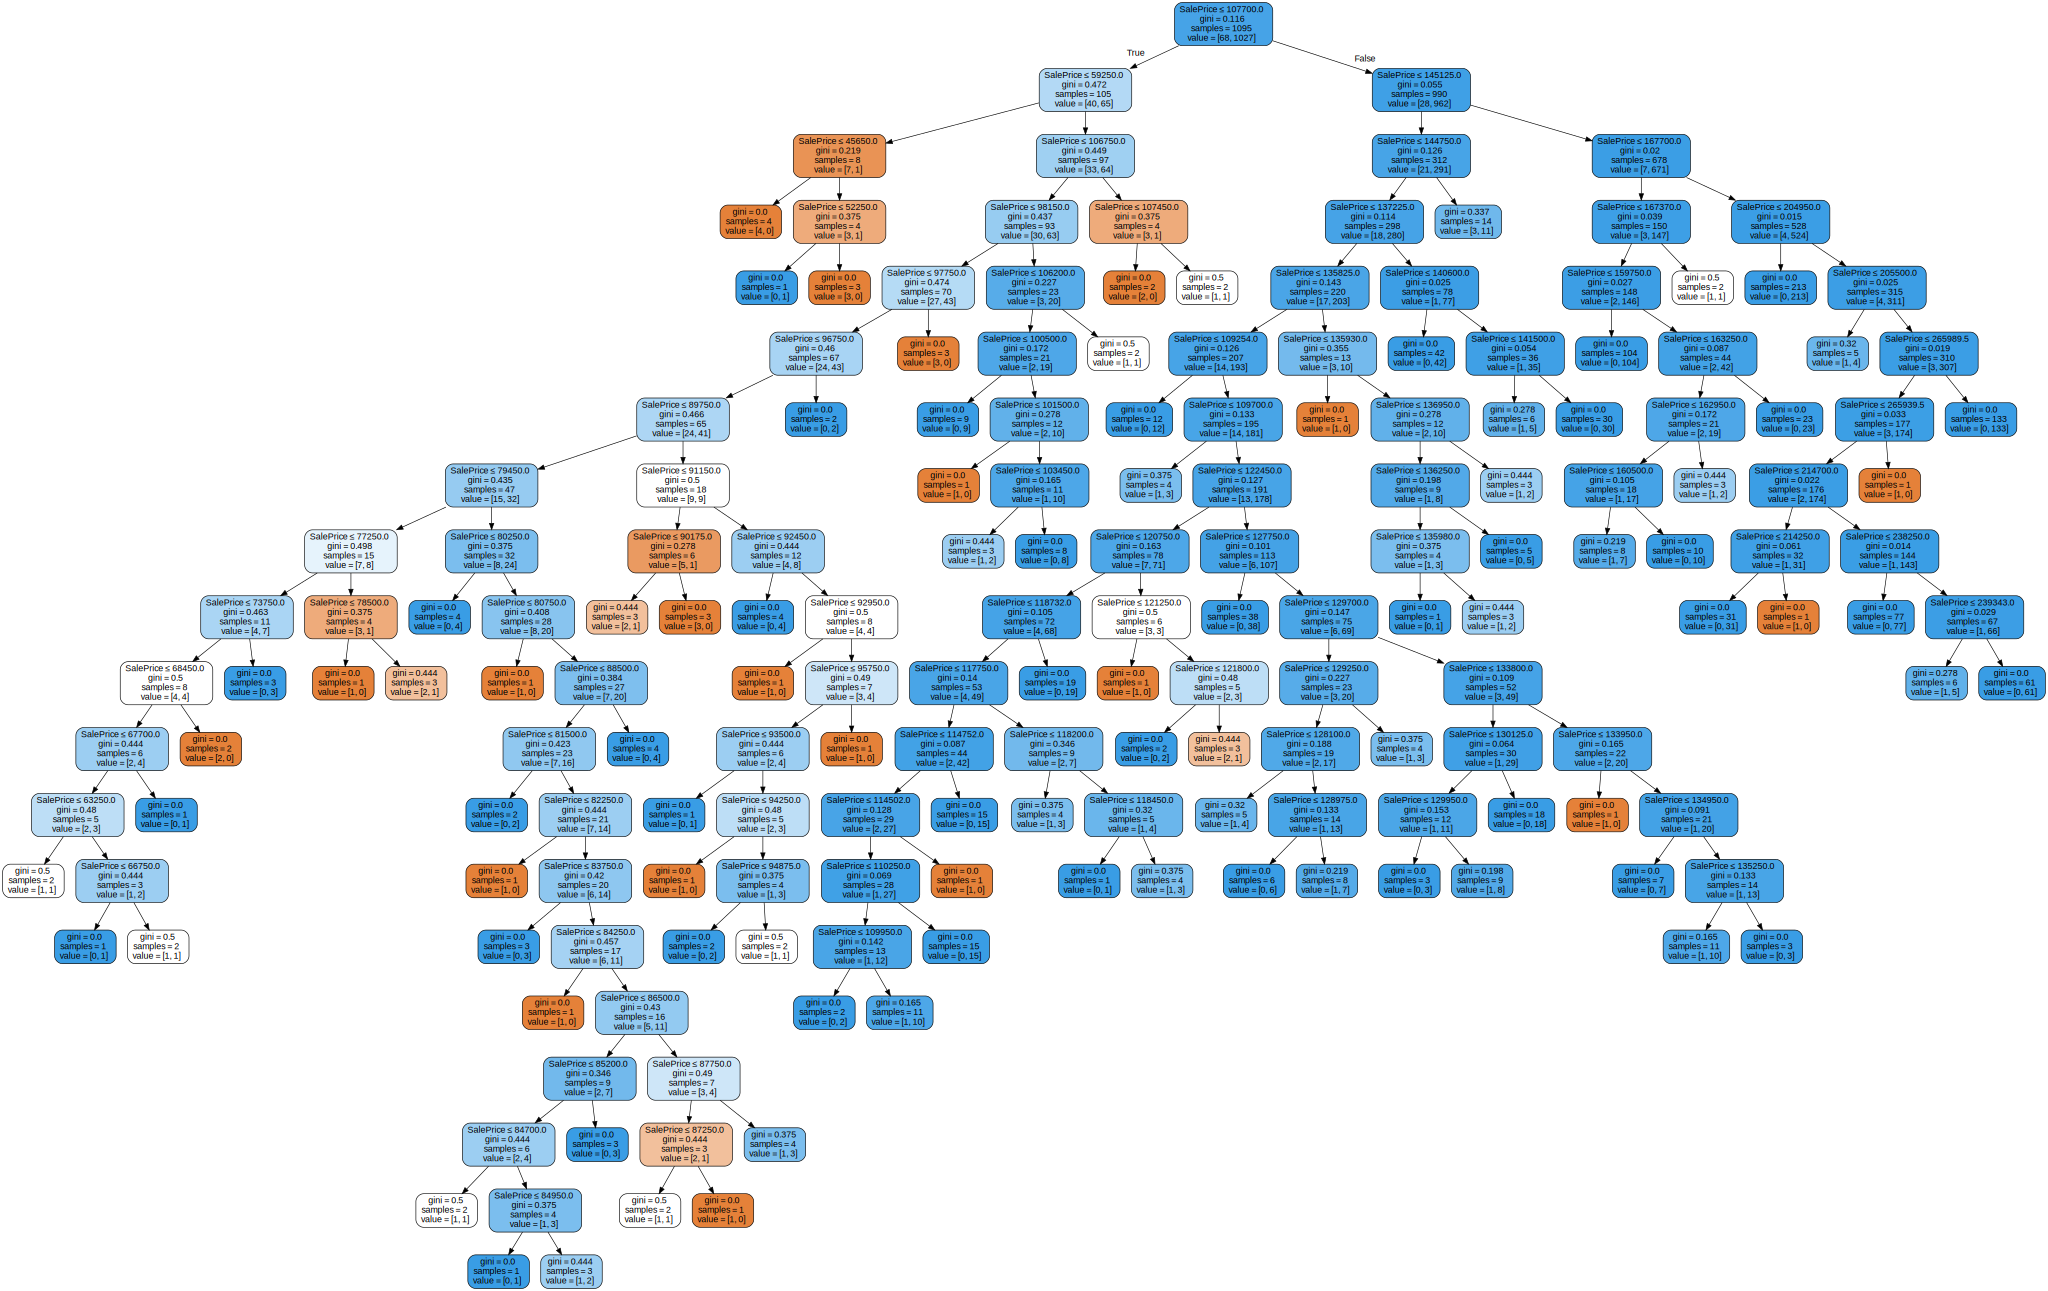

In [9]:
results['graph'][0][1]

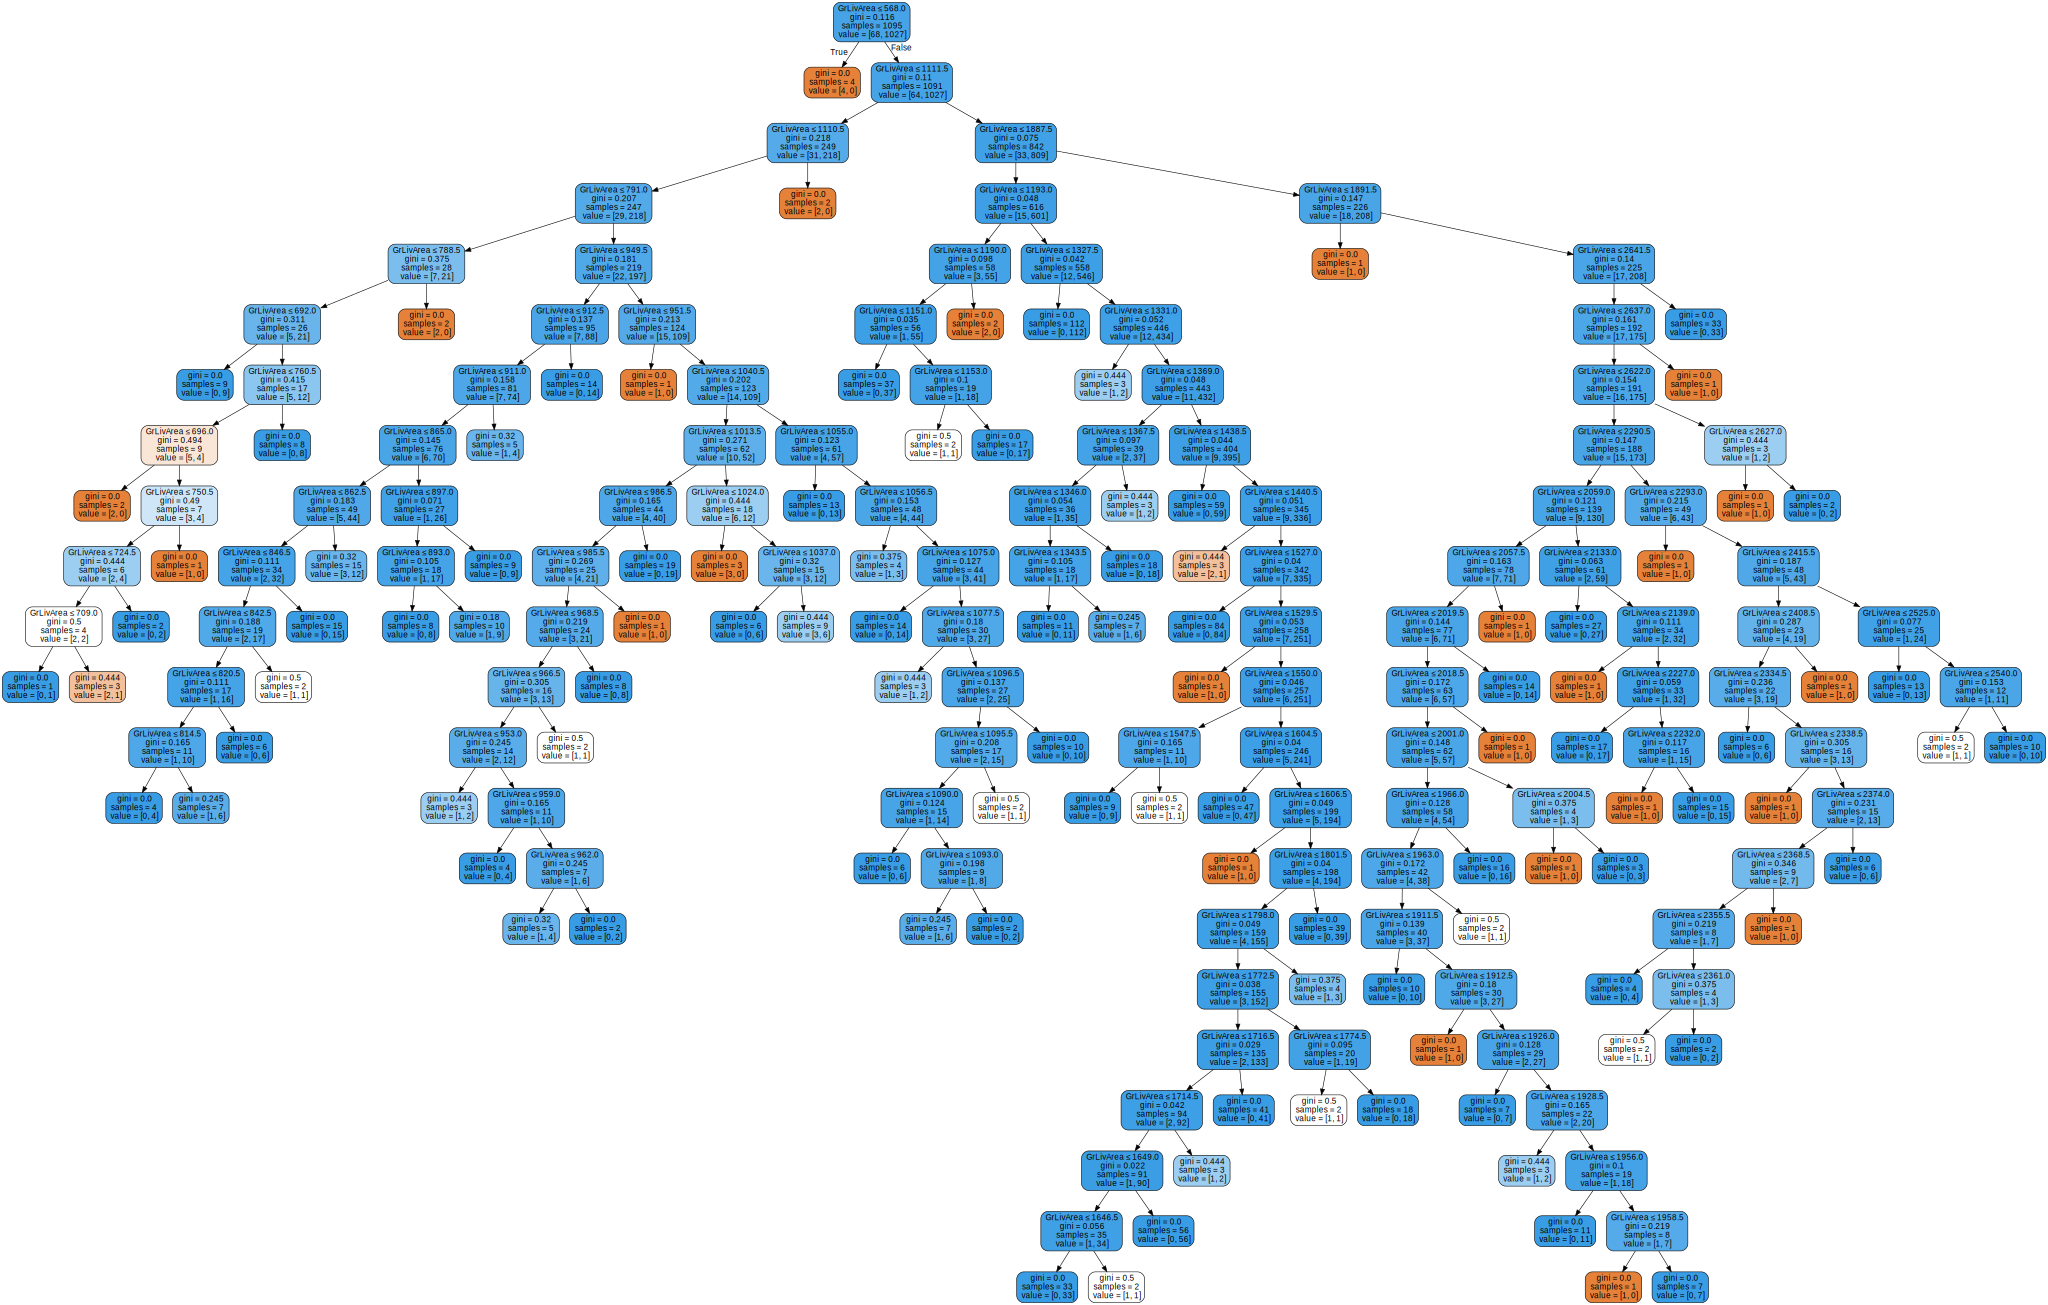

In [10]:
results['graph'][1][1]

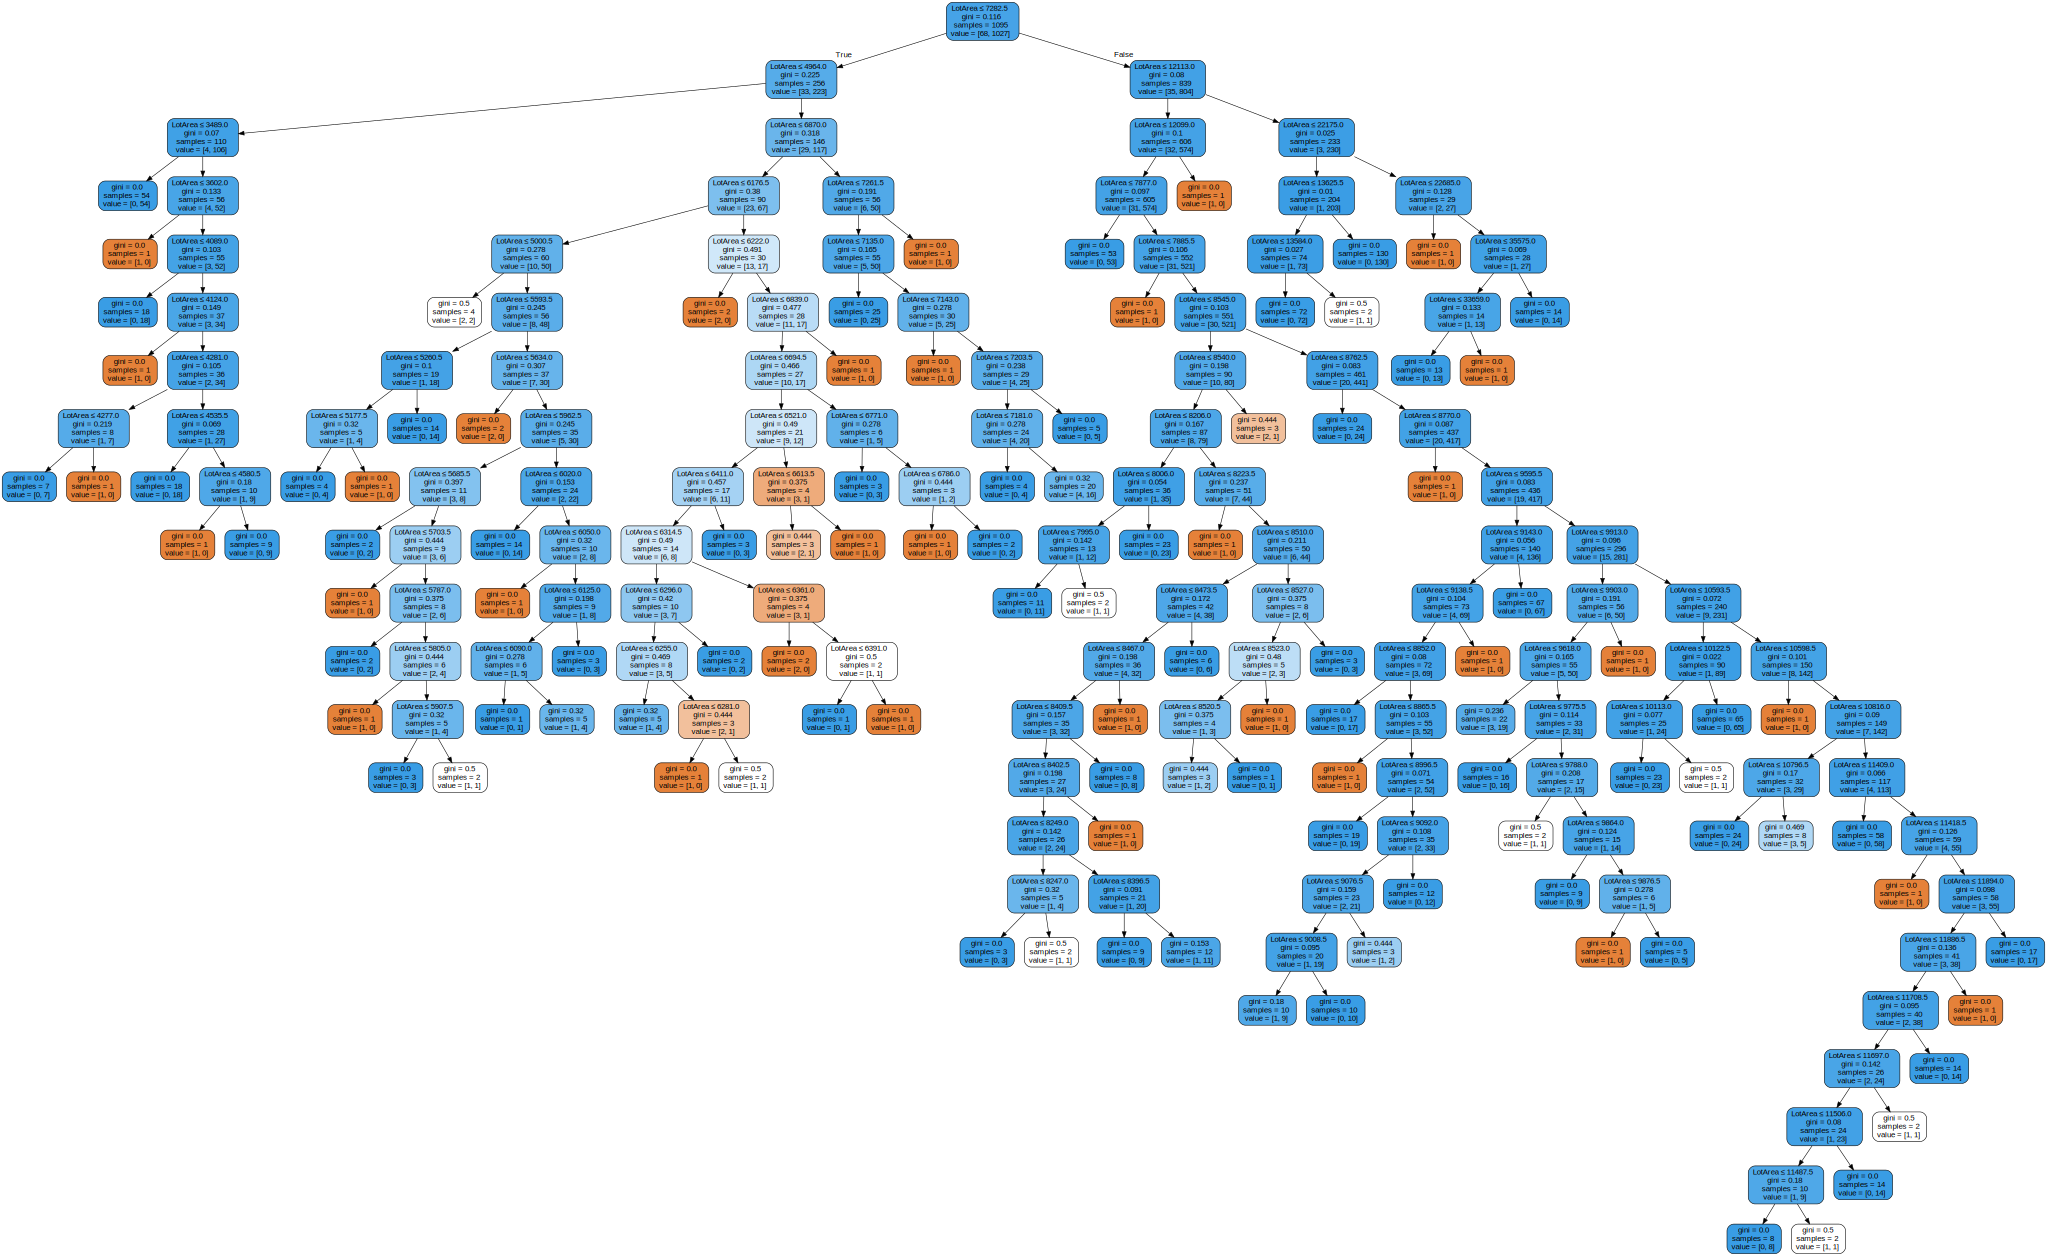

In [11]:
results['graph'][2][1]

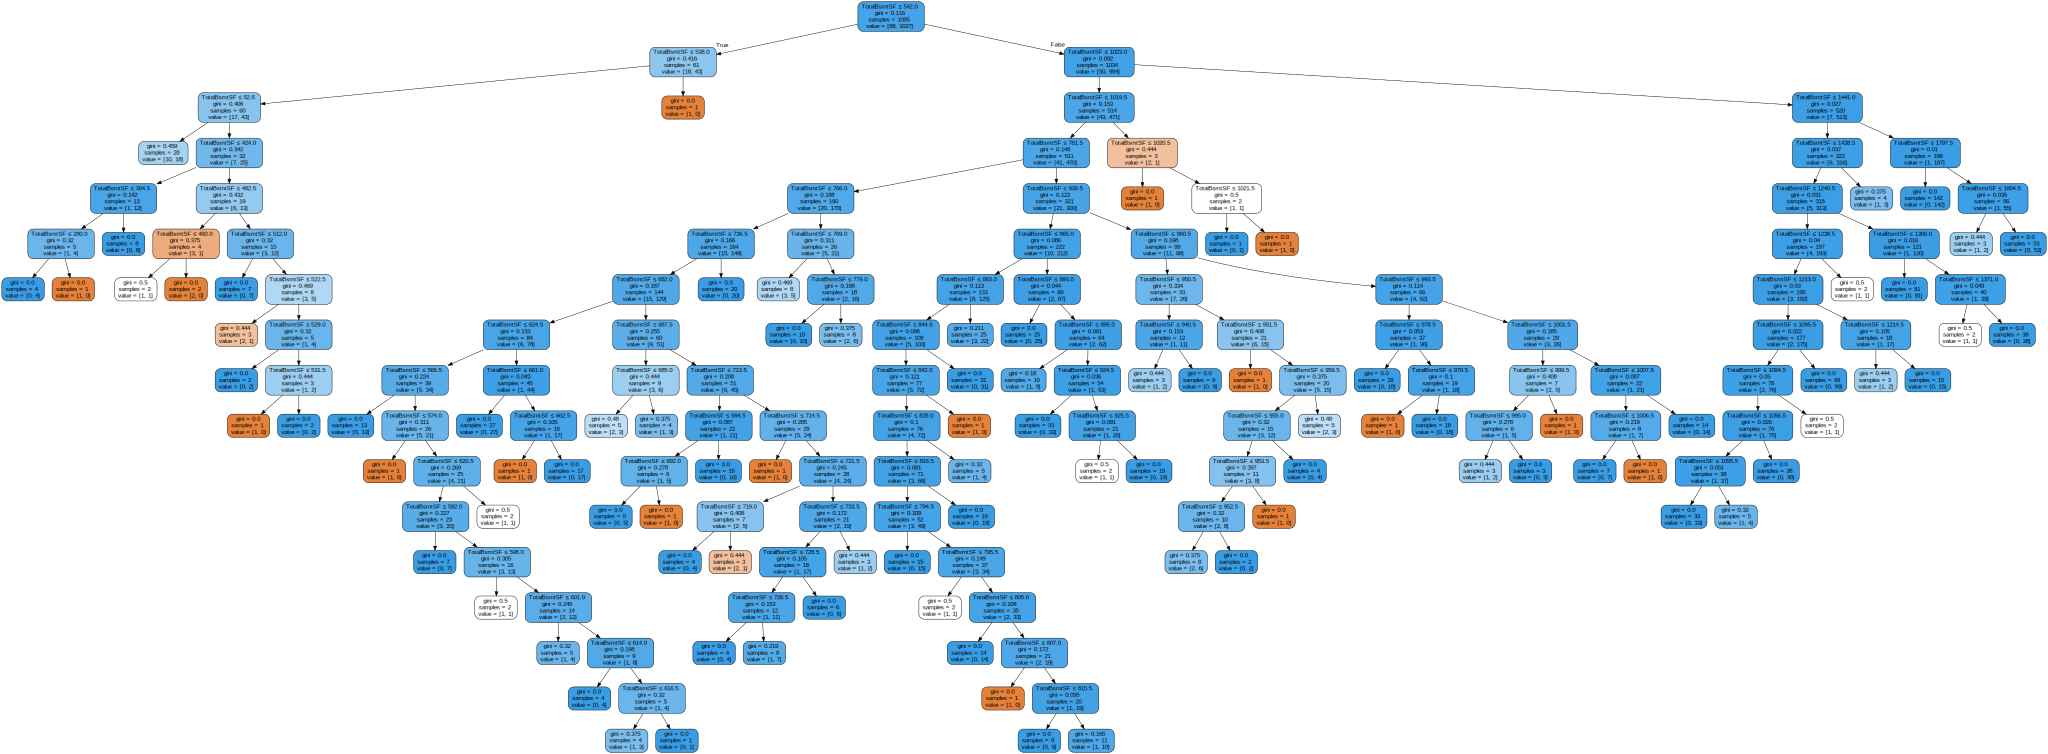

In [12]:
results['graph'][3][1]

<a id='problemsSummary'></a>

Compiled for easier viewing

<a href='#top'>Back to Top</a>

In [13]:
display(results)

,Names,Classif Acc,"TN, FP, FN, TP",Ratio to total N or Y
0,Train_SalePrice,0.97,"[46, 22, 11, 1016]","[0.68, 0.02, 0.16, 0.99]"
1,Test_SalePrice,0.92,"[9, 18, 12, 326]","[0.33, 0.05, 0.44, 0.96]"
2,Train_GrLivArea,0.97,"[48, 20, 12, 1015]","[0.71, 0.02, 0.18, 0.99]"
3,Test_GrLivArea,0.89,"[2, 25, 15, 323]","[0.07, 0.07, 0.56, 0.96]"
4,Train_LotArea,0.97,"[52, 16, 13, 1014]","[0.76, 0.02, 0.19, 0.99]"
5,Test_LotArea,0.90,"[5, 22, 15, 323]","[0.19, 0.07, 0.56, 0.96]"
6,Train_TotalBsmtSF,0.96,"[30, 38, 10, 1017]","[0.44, 0.04, 0.15, 0.99]"
7,Test_TotalBsmtSF,0.89,"[3, 24, 17, 321]","[0.11, 0.07, 0.63, 0.95]"


Things to note:
- High `True Negative` in `Train`
- Much lower `True Negative` in `Test` compared to `Train`
- Higher `False Negative` in `Test` compared to `Train`


This suggests that the model has memorized the `N` samples in the `Train` and guessed many `N` in `Test` instead of `Y` resulting in high `False Negative` in `Test`. A better model would be one with the negation of bullet points 2 and 3 above.

<a id='conclusion'></a>

### Conclusion

<a href='#top'>Back to Top</a>

The best model would seem to be `SalePrice`.

- Highest `Test`:`Train` ratio for `True Negative` among the univariate models
- Lowest `Test`:`Train` ratio for `False Negative` among the univariate models

This coincides with the observations made <a href='#insights'>here</a>

## Bonus Problems

<a id='bonus1'></a>

### Bonus 1

<a href='#top'>Back to Top</a>

Analyzing All_4


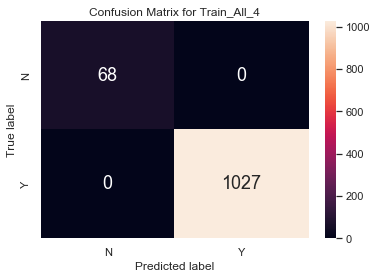

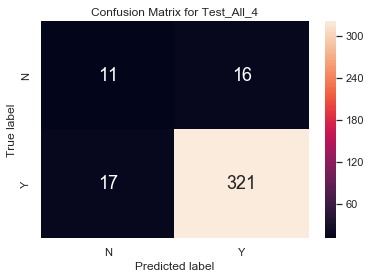

In [14]:
multivariate = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']
features = houseData[multivariate]
results = split_analyze(features, response, results, override_title= 'All_4')

<a id='bonus1Tree'></a>

### Decision Tree for Bonus 1

<a href='#top'>Back to Top</a>

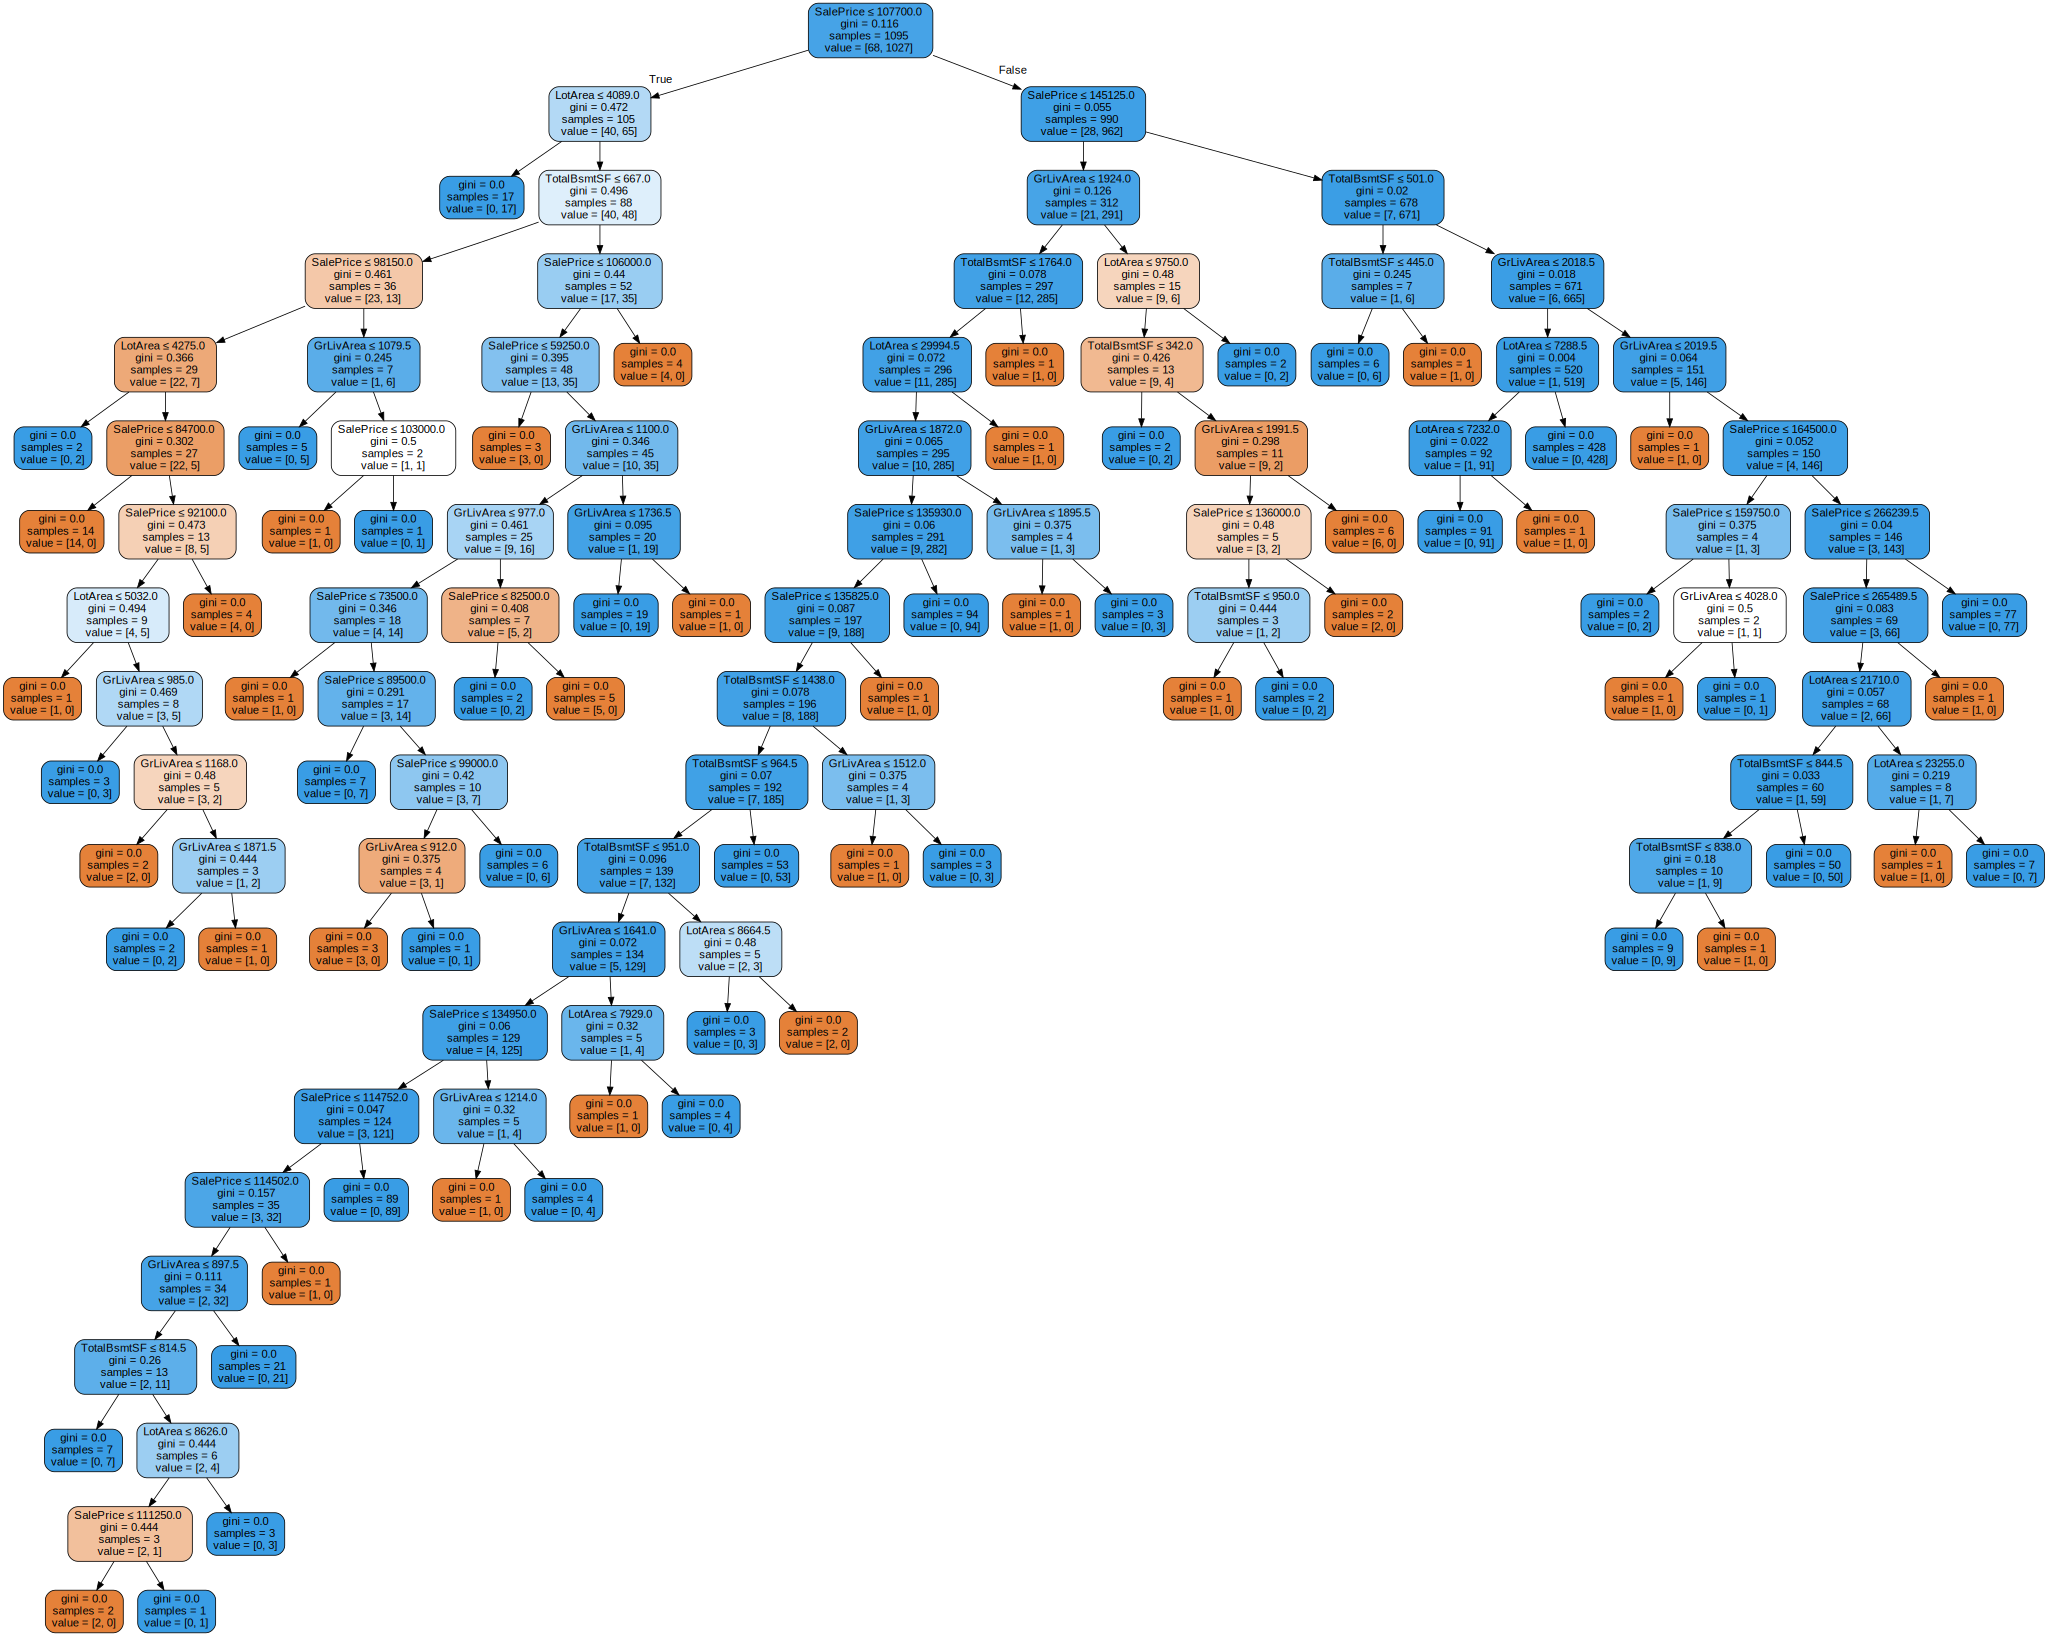

In [15]:
results['graph'][4][1]

<a id='bonus1Summary'></a>

Compiled for easier viewing

<a href='#top'>Back to Top</a>

In [16]:
display(results)

,Names,Classif Acc,"TN, FP, FN, TP",Ratio to total N or Y
0,Train_SalePrice,0.97,"[46, 22, 11, 1016]","[0.68, 0.02, 0.16, 0.99]"
1,Test_SalePrice,0.92,"[9, 18, 12, 326]","[0.33, 0.05, 0.44, 0.96]"
2,Train_GrLivArea,0.97,"[48, 20, 12, 1015]","[0.71, 0.02, 0.18, 0.99]"
3,Test_GrLivArea,0.89,"[2, 25, 15, 323]","[0.07, 0.07, 0.56, 0.96]"
4,Train_LotArea,0.97,"[52, 16, 13, 1014]","[0.76, 0.02, 0.19, 0.99]"
5,Test_LotArea,0.90,"[5, 22, 15, 323]","[0.19, 0.07, 0.56, 0.96]"
6,Train_TotalBsmtSF,0.96,"[30, 38, 10, 1017]","[0.44, 0.04, 0.15, 0.99]"
7,Test_TotalBsmtSF,0.89,"[3, 24, 17, 321]","[0.11, 0.07, 0.63, 0.95]"
8,Train_All_4,1.00,"[68, 0, 0, 1027]","[1.0, 0.0, 0.0, 1.0]"
9,Test_All_4,0.91,"[11, 16, 17, 321]","[0.41, 0.05, 0.63, 0.95]"


As discussed, the `GrLivArea`, `LotArea`, `TotalBsmtSF` complimented `SalePrice` in this multivariate model, improving `True Negative` in `Test`. This multivariate model seems to be the best performing so far. However, the `False Negative` is still pretty high.

<a id='bonus2'></a>

### Bonus 2

<a href='#top'>Back to Top</a>

In [17]:
numeric_features = ['LotArea', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     '1stFlrSF', 'MasVnrArea', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                     'LowQualFinSF', 
                     'SalePrice']

Analyzing All_Numeric


C:\Users\Nicholas\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


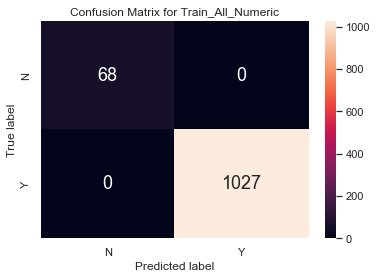

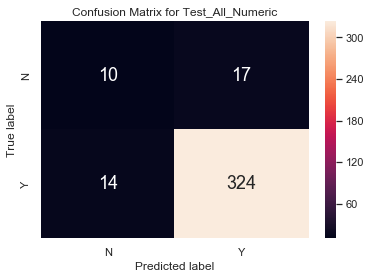

In [18]:
features = houseData[numeric_features]
features.fillna(value = features.median(), inplace = True)
results = split_analyze(features, response, results, override_title = 'All_Numeric')

<a id='bonus2Summary'></a>

Compiled for easier viewing

<a href='#top'>Back to Top</a>

In [19]:
display(results)

,Names,Classif Acc,"TN, FP, FN, TP",Ratio to total N or Y
0,Train_SalePrice,0.97,"[46, 22, 11, 1016]","[0.68, 0.02, 0.16, 0.99]"
1,Test_SalePrice,0.92,"[9, 18, 12, 326]","[0.33, 0.05, 0.44, 0.96]"
2,Train_GrLivArea,0.97,"[48, 20, 12, 1015]","[0.71, 0.02, 0.18, 0.99]"
3,Test_GrLivArea,0.89,"[2, 25, 15, 323]","[0.07, 0.07, 0.56, 0.96]"
4,Train_LotArea,0.97,"[52, 16, 13, 1014]","[0.76, 0.02, 0.19, 0.99]"
5,Test_LotArea,0.90,"[5, 22, 15, 323]","[0.19, 0.07, 0.56, 0.96]"
6,Train_TotalBsmtSF,0.96,"[30, 38, 10, 1017]","[0.44, 0.04, 0.15, 0.99]"
7,Test_TotalBsmtSF,0.89,"[3, 24, 17, 321]","[0.11, 0.07, 0.63, 0.95]"
8,Train_All_4,1.00,"[68, 0, 0, 1027]","[1.0, 0.0, 0.0, 1.0]"
9,Test_All_4,0.91,"[11, 16, 17, 321]","[0.41, 0.05, 0.63, 0.95]"


Using all numeric features seems to have decreased the `True Negative` while also decreasing the `False Negative`. This is the best model thus far as it seems to be able to distingish between `Y` and `N` more meaningfully.

<a id='bonus2Tree'></a>

### Decision Tree for Bonus 2

<a href='#top'>Back to Top</a>

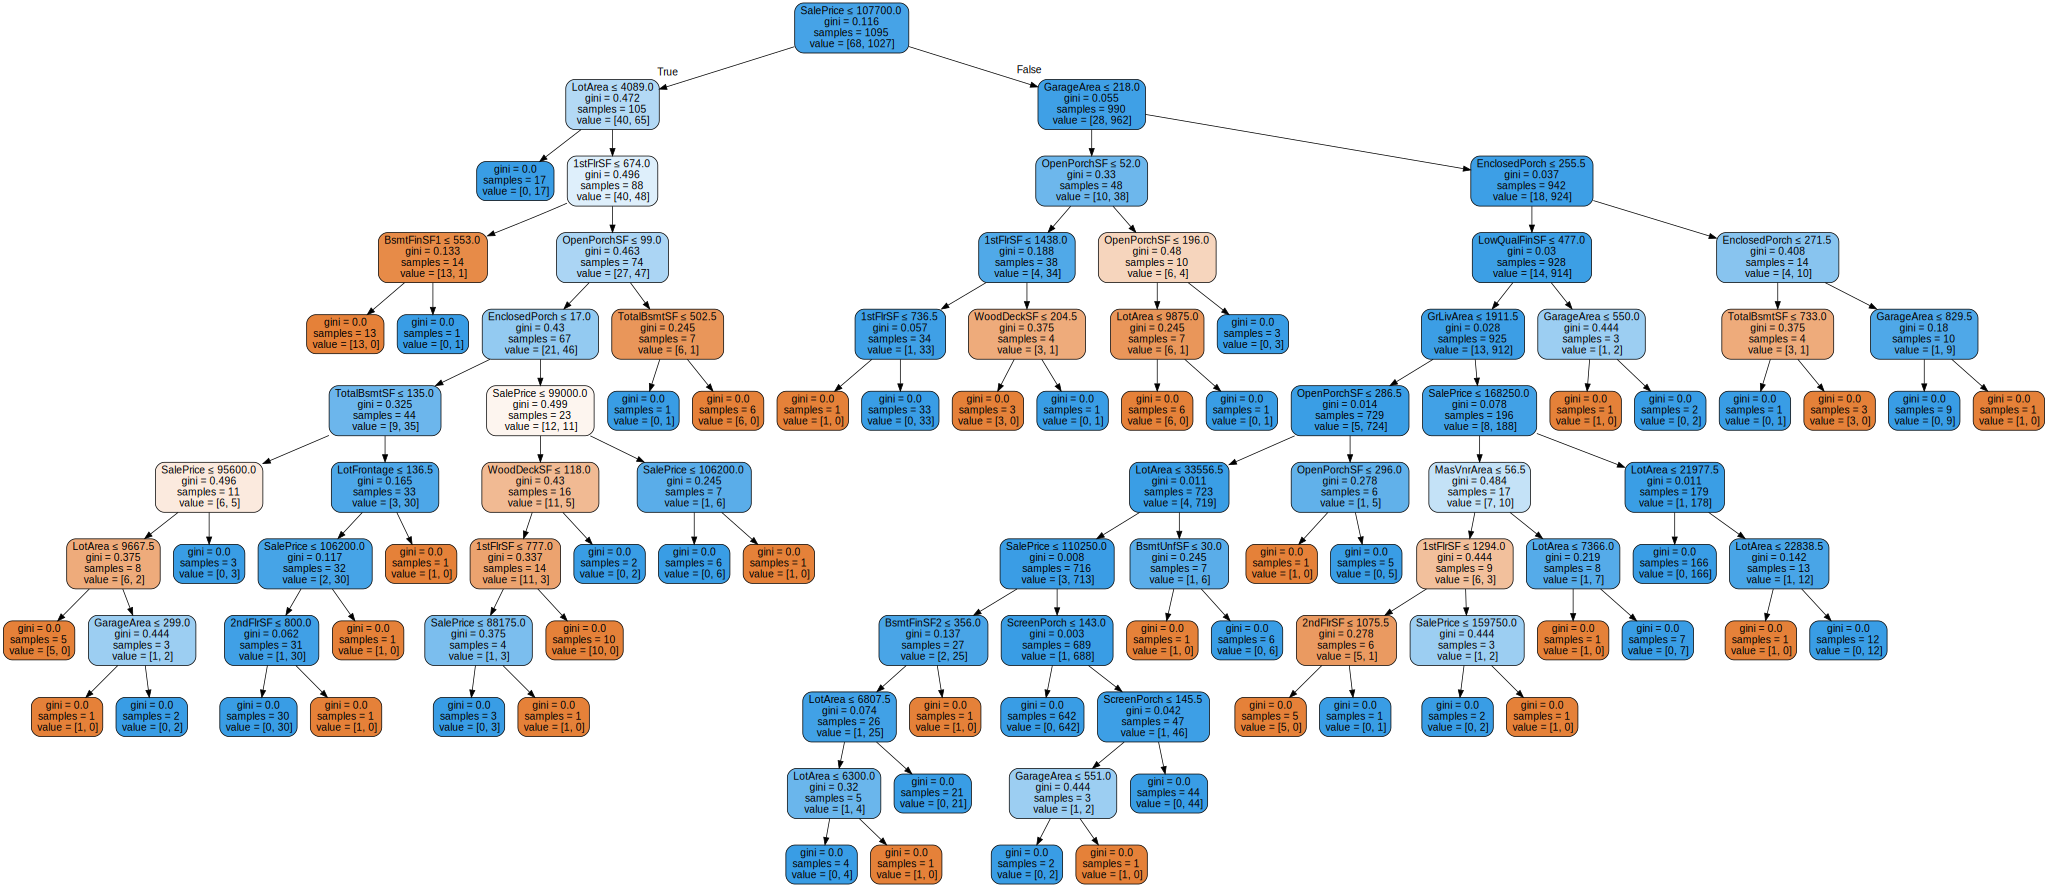

In [20]:
results['graph'][5][1]